In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')

import warnings
warnings.filterwarnings("ignore")


In [2]:
sampdf = pd.read_csv(r"C:\Users\Smart\Desktop\csv\Financial Sample1.csv")
sampdf

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,? 3.00,? 20.00,"? 32,370.00",? -,"? 32,370.00","? 16,185.00","? 16,185.00",01-01-2020,1,January,2020
1,Government,Germany,Carretera,None,1321.0,? 3.00,? 20.00,"? 26,420.00",? -,"? 26,420.00","? 13,210.00","? 13,210.00",01-01-2020,1,January,2020
2,Midmarket,France,Carretera,None,2178.0,? 3.00,? 15.00,"? 32,670.00",? -,"? 32,670.00","? 21,780.00","? 10,890.00",01-06-2020,6,June,2020
3,Midmarket,Germany,Carretera,None,888.0,? 3.00,? 15.00,"? 13,320.00",? -,"? 13,320.00","? 8,880.00","? 4,440.00",01-06-2020,6,June,2020
4,Midmarket,Mexico,Carretera,None,2470.0,? 3.00,? 15.00,"? 37,050.00",? -,"? 37,050.00","? 24,700.00","? 12,350.00",01-06-2020,6,June,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,Small Business,France,Amarilla,High,2475.0,? 260.00,? 300.00,"? 7,42,500.00","? 1,11,375.00","? 6,31,125.00","? 6,18,750.00","? 12,375.00",01-03-2014,3,March,2014
2796,Small Business,Mexico,Amarilla,High,546.0,? 260.00,? 300.00,"? 1,63,800.00","? 24,570.00","? 1,39,230.00","? 1,36,500.00","? 2,730.00",01-10-2014,10,October,2014
2797,Government,Mexico,Montana,High,1368.0,? 5.00,? 7.00,"? 9,576.00","? 1,436.40","? 8,139.60","? 6,840.00","? 1,299.60",01-02-2014,2,February,2014
2798,Government,Canada,Paseo,High,723.0,? 10.00,? 7.00,"? 5,061.00",? 759.15,"? 4,301.85","? 3,615.00",? 686.85,01-04-2014,4,April,2014


In [3]:
sampdf.columns=sampdf.columns.str.strip()


In [4]:
sampdf.head(2)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,? 3.00,? 20.00,"? 32,370.00",? -,"? 32,370.00","? 16,185.00","? 16,185.00",01-01-2020,1,January,2020
1,Government,Germany,Carretera,None,1321.0,? 3.00,? 20.00,"? 26,420.00",? -,"? 26,420.00","? 13,210.00","? 13,210.00",01-01-2020,1,January,2020


In [5]:
sampdf = sampdf.replace({'\?': ''},regex=True)


In [6]:
sampdf = sampdf.replace({'\-': ''},regex=True)


In [7]:
sampdf = sampdf.replace({'\,': ''},regex=True)


In [8]:
sampdf["Sale Price"]=sampdf["Sale Price"].apply(pd.to_numeric)

In [9]:
sampdf["Units Sold"]=sampdf["Units Sold"].apply(pd.to_numeric)

In [10]:
sampdf["Manufacturing Price"]=sampdf["Manufacturing Price"].apply(pd.to_numeric)

In [11]:
sampdf["Gross Sales"]=sampdf["Gross Sales"].apply(pd.to_numeric)

In [12]:
sampdf["Profit"] = pd.to_numeric(sampdf["Profit"],errors='coerce')

In [13]:
sampdf["Sales"]=sampdf["Sales"].apply(pd.to_numeric)

In [14]:
sampdf["COGS"]=sampdf["COGS"].apply(pd.to_numeric)

In [15]:
sampdf["Discounts"] = pd.to_numeric(sampdf["Discounts"],errors='coerce')

In [16]:
sampdf['Date'] =sampdf['Date'].apply(pd.to_datetime,format='%d%m%Y')

In [17]:
sampdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              2800 non-null   object        
 1   Country              2800 non-null   object        
 2   Product              2800 non-null   object        
 3   Discount Band        2800 non-null   object        
 4   Units Sold           2800 non-null   float64       
 5   Manufacturing Price  2800 non-null   float64       
 6   Sale Price           2800 non-null   float64       
 7   Gross Sales          2800 non-null   float64       
 8   Discounts            2588 non-null   float64       
 9   Sales                2800 non-null   float64       
 10  COGS                 2800 non-null   float64       
 11  Profit               2780 non-null   float64       
 12  Date                 2800 non-null   datetime64[ns]
 13  Month Number         2800 non-nul

In [18]:
sampdf=sampdf.dropna()

In [19]:
sampdf.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

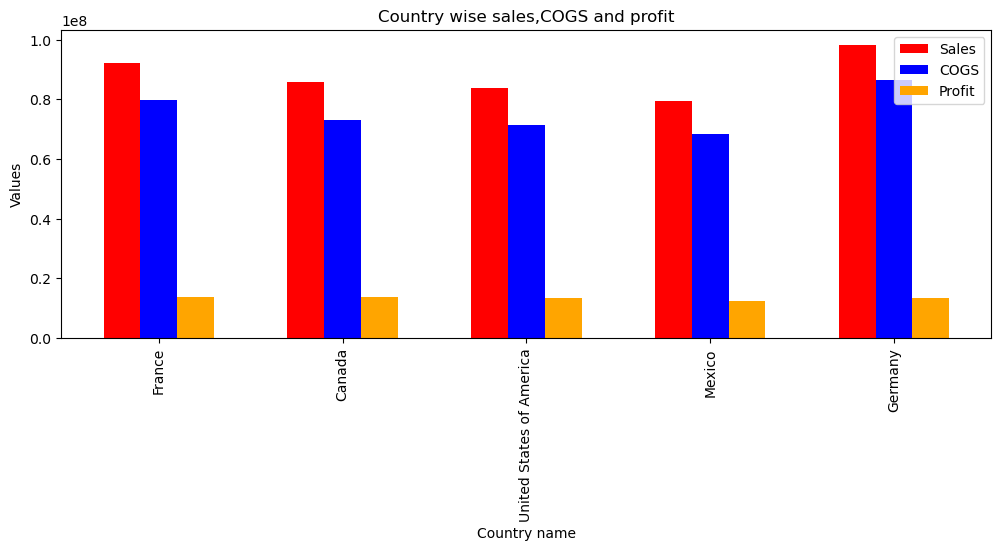

In [20]:
plt.figure(figsize=(12, 4))

u_countries = sampdf['Country'].unique()

plt.bar(np.arange(len(u_countries)) - 0.2, sampdf.groupby('Country')['Sales'].sum(), width=0.2, color="Red", label='Sales')

plt.bar(np.arange(len(u_countries)), sampdf.groupby('Country')['COGS'].sum(), width=0.2, color="Blue", label='COGS')

plt.bar(np.arange(len(u_countries)) + 0.2, sampdf.groupby('Country')['Profit'].sum(), width=0.2, color="Orange", label='Profit')

plt.xticks(np.arange(len(u_countries)), u_countries, rotation=90)

plt.title("Country wise sales,COGS and profit")
plt.xlabel('Country name')
plt.ylabel('Values')
plt.legend()
plt.show()


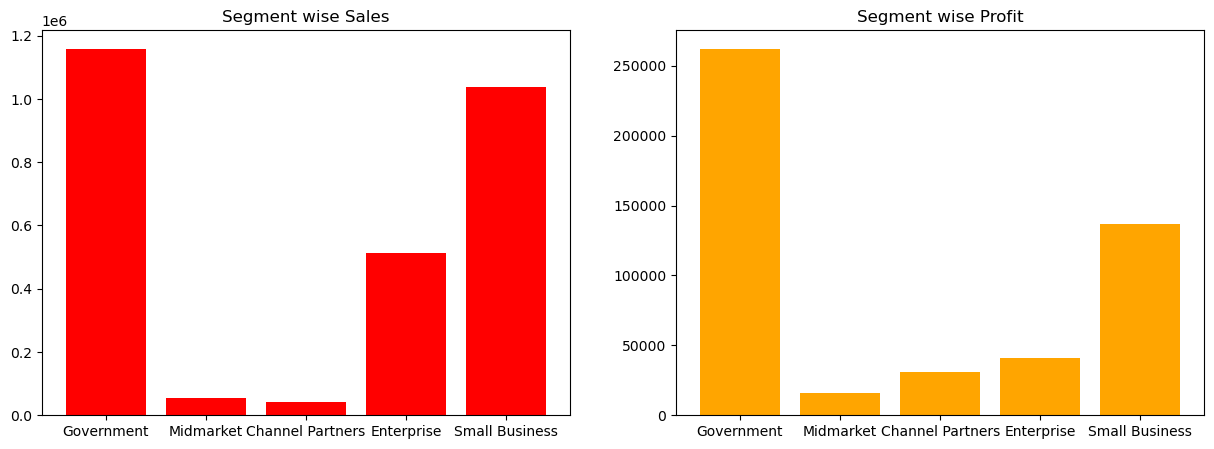

In [27]:

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].bar(sampdf['Segment'],sampdf['Sales'],color="Red")

axs[0].set_title('Segment wise Sales')

axs[1].bar(sampdf['Segment'],sampdf['Profit'],color="Orange")

axs[1].set_title('Segment wise Profit')


plt.show()


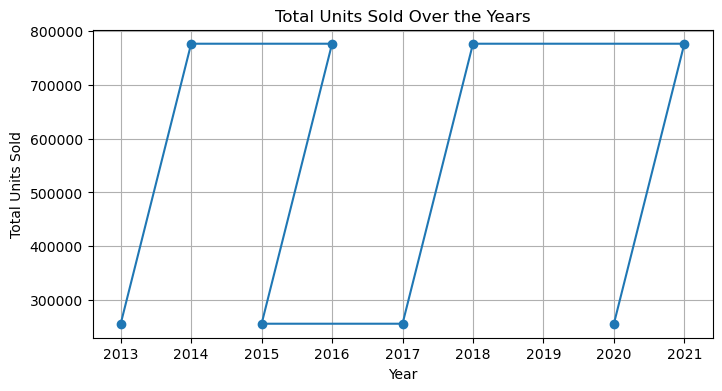

In [22]:
plt.figure(figsize=(8,4))

plt.plot(sampdf["Year"].unique(), sampdf.groupby("Year")["Units Sold"].sum(), marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over the Years")

plt.grid(True)
plt.show() 

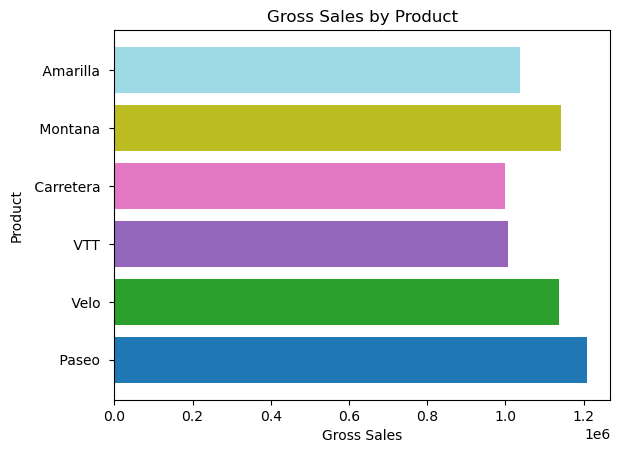

In [23]:

u_products = sampdf['Product'].unique()
colors = plt.cm.get_cmap('tab20',len(sampdf['Product'].unique())) 

product_colors = {product: colors(i) for i, product in enumerate(sampdf['Product'].unique())}

bar_colors = [product_colors[product] for product in sampdf['Product']]

plt.barh(sampdf['Product'], sampdf['Gross Sales'], color=bar_colors)
plt.xlabel('Gross Sales')
plt.ylabel('Product')
plt.title('Gross Sales by Product')
plt.show()


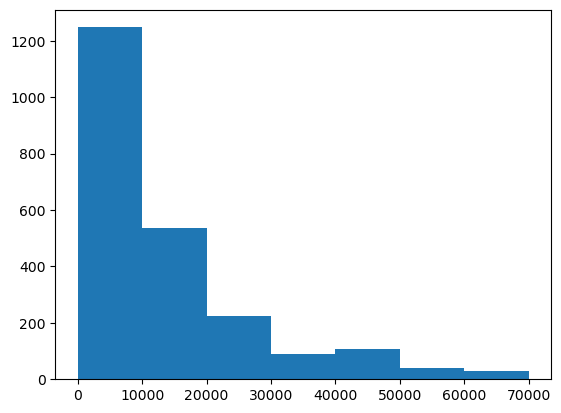

In [24]:
plt.hist(sampdf['Profit'],bins=[0,10000,20000,30000,40000,50000,60000,70000])
plt.show()

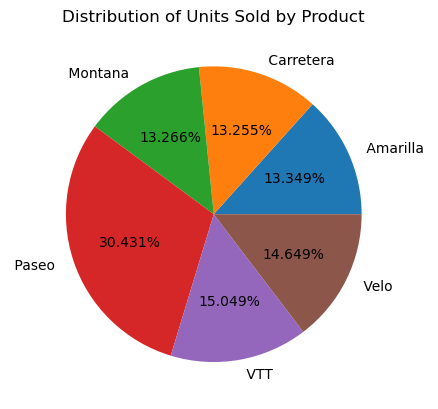

In [25]:
sum_u_sold = sampdf.groupby('Product')['Units Sold'].sum()

plt.pie(sum_u_sold, labels=sum_u_sold.index, autopct='%1.3f%%') 

plt.title('Distribution of Units Sold by Product')
plt.show()
